## Rename the dataset

In [ ]:
import os
import re

# The directory containing the files
directory = '/Users/anilrao/Desktop/Capstone_Code/dataset'

# Regex pattern to match the file names
pattern = re.compile(r"cylinder_Bscan_2D_[0-9]+_concrete_[0-9]*\.[0-9]+_[0-9]*\.[0-9]+_post\.png")

# Base for new file names
new_base_name = "concrete"

# Counter for unique file names
counter = 241

# Iterate over the files in the directory
for filename in os.listdir(directory):
    # Match the file name using the regex pattern
    if pattern.match(filename):
        # Get the extension of the current file
        _, extension = os.path.splitext(filename)
        
        # Construct the new file name using the new base name, a counter for uniqueness, and original extension
        new_filename = f"{new_base_name}_{counter}{extension}"
        counter += 1  # Increment the counter for the next file
        
        # Construct the full old and new file paths
        old_file_path = os.path.join(directory, filename)
        new_file_path = os.path.join(directory, new_filename)
        
        # Rename the file
        os.rename(old_file_path, new_file_path)
        print(f"Renamed file from {filename} to {new_filename}")


## Logic for Data Augmentation

In [ ]:
from PIL import Image

# Open an image file
with Image.open('/Users/anilrao/Desktop/Capstone_Code/dataset/concrete_1.png') as image:
    # Flip the image horizontally
    flipped_image = image.transpose(Image.FLIP_LEFT_RIGHT)
    
    # Save it to a file, if desired
    flipped_image.save('/Users/anilrao/Desktop/Capstone_Code/horizontally_flipped.png')

    # If you want to display the image in Jupyter Notebook
    display(flipped_image)

## Check size of each image

In [12]:
filepath = "/Users/anilrao/Desktop/Capstone_Code/dataset/concrete_245.png"

img = Image.open (filepath)

width, height = img.size

print(f"The dimensions of the image are:, {width}, “x”, {height}")

The dimensions of the image are:, 1182, “x”, 1175


## Data Augmentation for Negative Samples (Without Landmine)

In [ ]:
import os
import re

# The directory containing the files
directory = '/Users/anilrao/Desktop/Capstone_Code/dataset'

# Regex pattern to match the file names
pattern = re.compile(r"concrete_[0-9]+\.png")

# Base for new file names
new_base_name = "concrete"

# Counter for unique file names
counter = 241

# Iterate over the files in the directory
for filename in os.listdir(directory):
    # Match the file name using the regex pattern
    if pattern.match(filename):
        # Get the extension of the current file
        _, extension = os.path.splitext(filename)
        
        # Construct the new file name using the new base name, a counter for uniqueness, and original extension
        new_filename = f"{new_base_name}_{counter}{extension}"

        with Image.open(f'/Users/anilrao/Desktop/Capstone_Code/dataset/{filename}') as image:
            # Flip the image horizontally
            flipped_image = image.transpose(Image.FLIP_LEFT_RIGHT)
        
            # Save it to a file, if desired
            flipped_image.save(f'/Users/anilrao/Desktop/Capstone_Code/dataset/{new_filename}')
            #print(f"oldfile : {filename}, augmented : {new_filename}\n")
        counter += 1  # Increment the counter for the next file

In [2]:
from PIL import Image
import tensorflow as tf
import os,glob
import cv2
from tqdm.notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten


In [4]:
os.chdir('/Users/anilrao/Desktop/Capstone_Code/dataset/yes')
X = []
y = []
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append('Y')
      print('Y')

  0%|          | 0/480 [00:00<?, ?it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


In [5]:
os.chdir('/Users/anilrao/Desktop/Capstone_Code/dataset/no')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append('N')
      print('N')

  0%|          | 0/480 [00:00<?, ?it/s]

N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N


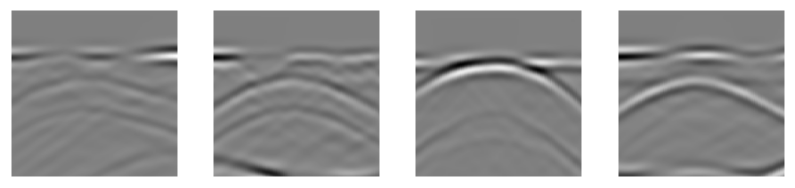

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)


In [8]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test) 
print("X_train Shape: ", X_train.shape) 
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape) 
print("y_test Shape: ", y_test.shape)

X_train Shape:  (768, 224, 224, 3)
X_test Shape:  (192, 224, 224, 3)
y_train Shape:  (768, 2)
y_test Shape:  (192, 2)


In [9]:
from keras.applications import vgg16

img_rows, img_cols = 224, 224 
vgg = vgg16.VGG16(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (img_rows, img_cols, 3))

# Here we freeze the last 4 layers 
# Layers are set to trainable as True by default
for layer in vgg.layers:
    layer.trainable = False

2023-11-07 16:43:13.879259: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-07 16:43:13.879289: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-07 16:43:13.879294: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-07 16:43:13.879358: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-07 16:43:13.879411: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


58889256/58889256 [==============================] - 7s 0us/step


In [10]:
# Printing the layers
for (i,layer) in enumerate(vgg.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.models import Model

In [16]:
def lw(bottom_model, num_classes):
    """creates the top or head of the model that will be 
    placed ontop of the bottom layers"""

    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='sigmoid')(top_model)
    return top_model 

In [15]:
num_classes = 2

FC_Head = lw(vgg, num_classes)

model = Model(inputs = vgg.input, outputs = FC_Head)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [19]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model.fit(X_train,y_train, 
                    epochs=10, 
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    initial_epoch=0)

Epoch 1/10
24/24 [==============================] - 13s 523ms/step - loss: 6.6873 - accuracy: 0.6667 - val_loss: 0.8305 - val_accuracy: 0.8438
Epoch 2/10
24/24 [==============================] - 12s 515ms/step - loss: 0.8396 - accuracy: 0.8060 - val_loss: 0.8260 - val_accuracy: 0.8125
Epoch 3/10
24/24 [==============================] - 12s 513ms/step - loss: 0.9861 - accuracy: 0.8073 - val_loss: 1.4228 - val_accuracy: 0.6719
Epoch 4/10
24/24 [==============================] - 12s 518ms/step - loss: 0.7365 - accuracy: 0.8411 - val_loss: 0.2861 - val_accuracy: 0.9010
Epoch 5/10
24/24 [==============================] - 12s 516ms/step - loss: 0.7861 - accuracy: 0.8411 - val_loss: 3.2374 - val_accuracy: 0.6823
Epoch 6/10
24/24 [==============================] - 12s 514ms/step - loss: 0.9936 - accuracy: 0.8359 - val_loss: 0.3193 - val_accuracy: 0.9375
Epoch 7/10
24/24 [==============================] - 12s 516ms/step - loss: 0.8656 - accuracy: 0.8685 - val_loss: 0.7899 - val_accuracy: 0.8750

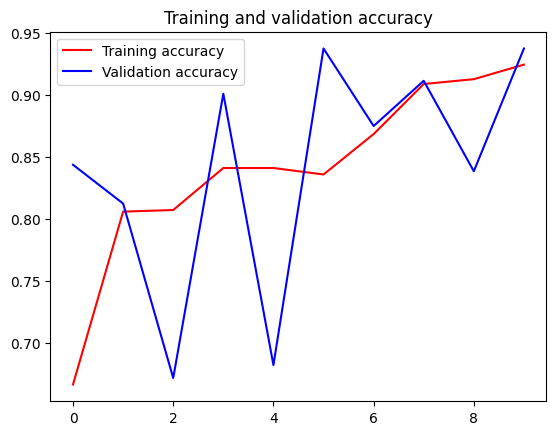

<Figure size 640x480 with 0 Axes>

In [20]:
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()